In [1]:
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import dtreeviz
from IPython.display import Image, display_svg, SVG
import IPython
from fastbook import *

import pandas as pd

In [3]:
comp = 'bluebook-for-bulldozers'
path = URLs.path(comp)
path

Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers')

In [4]:
from kaggle import api

if not path.exists():
    path.mkdir(parents = true)
    api.competition_download_cli(comp, path = path)
    shutil.unpack_archive(str(path/f'{comp}.zip'),str(path))

In [36]:
path.ls(file_exts = '.csv')

(#7) [Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/Machine_Appendix.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/median_benchmark.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/random_forest_benchmark_test.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/Test.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/TrainAndValid.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/Valid.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/ValidSolution.csv')]

In [86]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [87]:
df.shape

(412698, 53)

In [88]:
df.ProductSize.unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [89]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [90]:
df.ProductSize = df.ProductSize.astype('category')

In [91]:
df.ProductSize = df.ProductSize.cat.set_categories(sizes, ordered = True)

In [92]:
df[df.ProductSize == 'Small'].ProductSize

3         Small
44        Small
52        Small
55        Small
71        Small
          ...  
412658    Small
412667    Small
412668    Small
412669    Small
412670    Small
Name: ProductSize, Length: 27057, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [93]:
dep_var = 'SalePrice'

In [94]:
df[dep_var] = np.log(df[dep_var])

In [95]:
df[dep_var] 

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [96]:
df = add_datepart(df, 'saledate')

In [97]:
df_test = pd.read_csv(path/'Test.csv', low_memory = False)
df_test = add_datepart(df_test, 'saledate')

In [98]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [99]:
procs = [Categorify, FillMissing]

In [100]:
cond = (df.saleYear<2011) | (df.saleMonth<10)

In [101]:
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

In [102]:
splits = (list(train_idx),list(valid_idx))

In [86]:
cont,cat = cont_cat_split(df, 1, dep_var = dep_var)

In [87]:
to = TabularPandas(df, procs, cat, cont, y_names= dep_var, splits=splits)

In [88]:
len(to.train), len(to.valid)

(404710, 7988)

In [89]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [90]:
to1 = TabularPandas(df, procs, ['state', 'ProductGroup', 'Drive_System', 'Enclosure'], [], y_names = dep_var, splits=splits)

In [91]:
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [92]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,...,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,...,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,...,57,1,1,1,1,1,1,1.077754e+09,1,1


In [7]:
to = pickle.load(open(path/"to.pkl", "rb"))

In [8]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [16]:
xs,y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [12]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

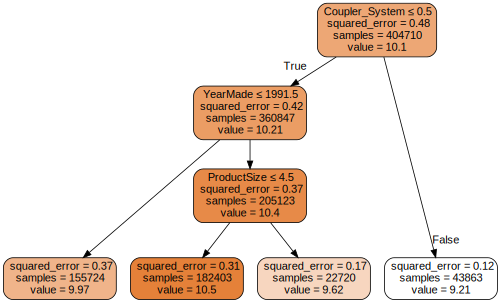

In [10]:
draw_tree(m, xs, size=7, leaves_parallel = True, precision =2)

[Text(0.6, 0.875, 'x[30] <= 0.5\nsquared_error = 0.482\nsamples = 404710\nvalue = 10.104'),
 Text(0.4, 0.625, 'x[57] <= 1991.5\nsquared_error = 0.417\nsamples = 360847\nvalue = 10.213'),
 Text(0.2, 0.375, 'squared_error = 0.375\nsamples = 155724\nvalue = 9.969'),
 Text(0.6, 0.375, 'x[6] <= 4.5\nsquared_error = 0.37\nsamples = 205123\nvalue = 10.398'),
 Text(0.4, 0.125, 'squared_error = 0.31\nsamples = 182403\nvalue = 10.495'),
 Text(0.8, 0.125, 'squared_error = 0.173\nsamples = 22720\nvalue = 9.622'),
 Text(0.8, 0.625, 'squared_error = 0.115\nsamples = 43863\nvalue = 9.208')]

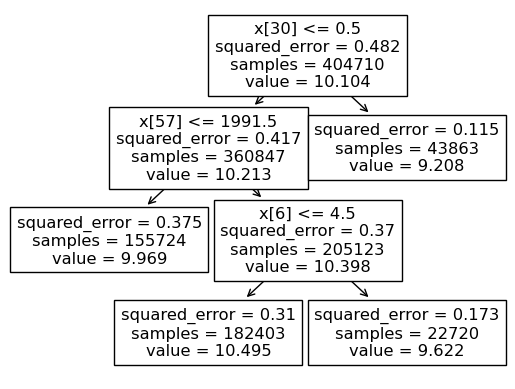

In [38]:
tree.plot_tree(m)

In [10]:
samp_idx = np.random.permutation(len(y))[:500]

In [13]:
viz = dtreeviz.model(m, xs.iloc[samp_idx], y.iloc[samp_idx],
                     feature_names = xs.columns, target_name = dep_var)

C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


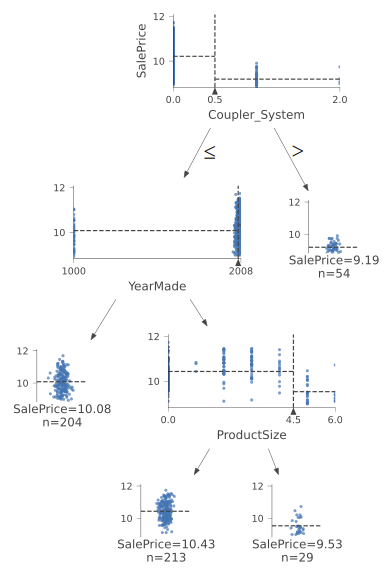

In [14]:
viz.view(fontname = 'DejaVu Sans', scale = 1.6, label_fontsize = 10,
        orientation = 'TD')

In [15]:
xs.loc[xs.YearMade<1900, 'YearMade'] = 1950

In [16]:
valid_xs.loc[valid_xs.YearMade <1900, 'YearMade'] = 1950

In [17]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)

C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


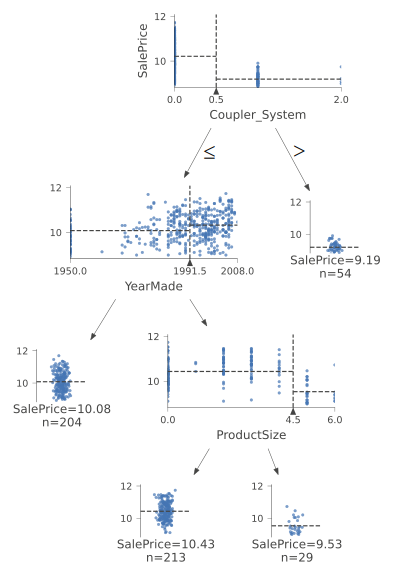

In [18]:
viz = dtreeviz.model(m , xs.iloc[samp_idx], y.iloc[samp_idx],
                     feature_names=xs.columns.values.tolist(), target_name=dep_var)
viz.view(fontname = 'DejaVu Sans', scale = 1.6, label_fontsize = 10,
        orientation = 'TD')

In [18]:
def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs,y): return r_mse(m.predict(xs), y)

In [21]:
m_rmse(m, xs,y)

0.0

In [22]:
m_rmse(m, valid_xs, valid_y)

0.332747

In [23]:
m.get_n_leaves(), len(xs)

(324567, 404710)

In [24]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.248595, 0.323366)

In [25]:
m.get_n_leaves()

12397

In [14]:
def rf(xs, y, n_estimatros = 40, max_samples =200_000,
      max_features =0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs = -1, n_estimators = n_estimatros,
                                max_samples = max_samples, max_features=max_features,
                                min_samples_leaf=min_samples_leaf,oob_score = True).fit(xs,y)

In [27]:
m = rf(xs,y)

In [28]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.17101, 0.234)

In [29]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\U

In [30]:
r_mse(preds.mean(0), valid_y)

0.234

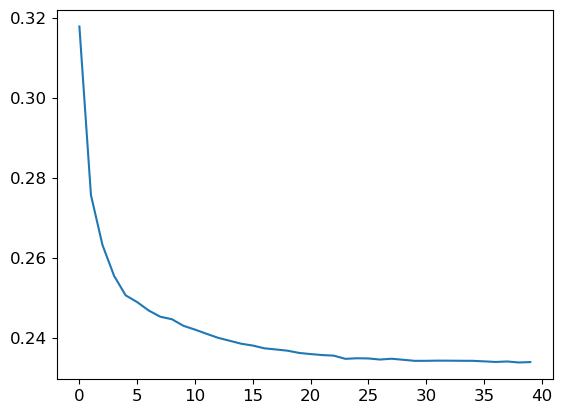

In [31]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [32]:
r_mse(m.oob_prediction_, y)

0.210789

In [33]:
preds.shape

(40, 7988)

In [34]:
preds_std = preds.std(0)

In [35]:
preds_std[:5]

array([0.24292985, 0.11111063, 0.10300225, 0.26425203, 0.12694987])

# Feature Importance


In [52]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [37]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.180932
6,ProductSize,0.121190
30,Coupler_System,0.115745
7,fiProductClassDesc,0.073741
31,Grouser_Tracks,0.053572
54,ModelID,0.051582
65,saleElapsed,0.050454
3,fiSecondaryDesc,0.046125
1,fiModelDesc,0.033822
12,Enclosure,0.028765


<Axes: ylabel='cols'>

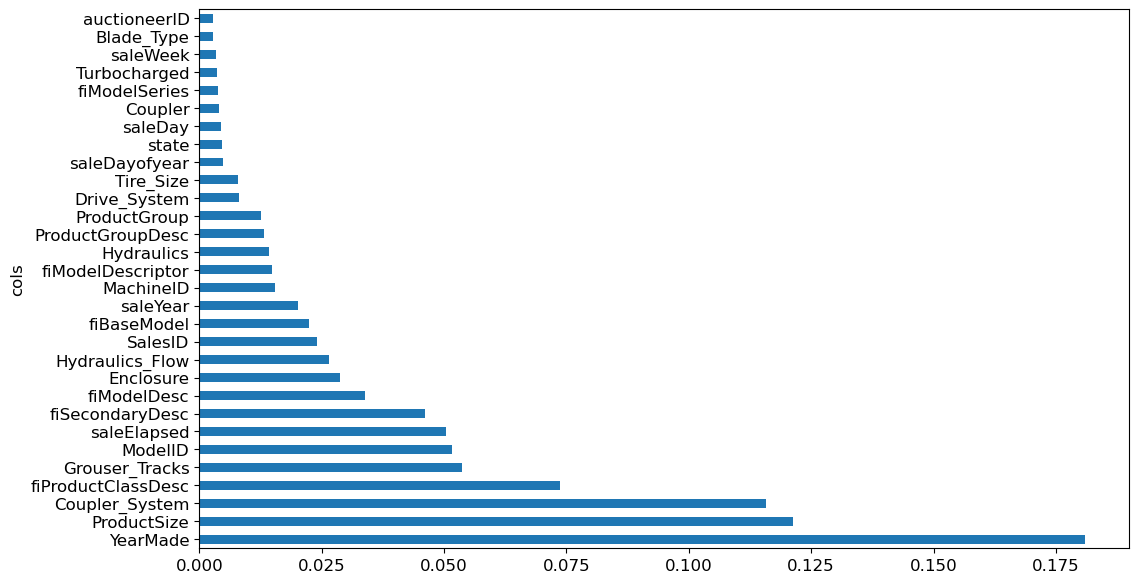

In [38]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize = (12,7), legend = False)

plot_fi(fi[:30])

<Axes: ylabel='cols'>

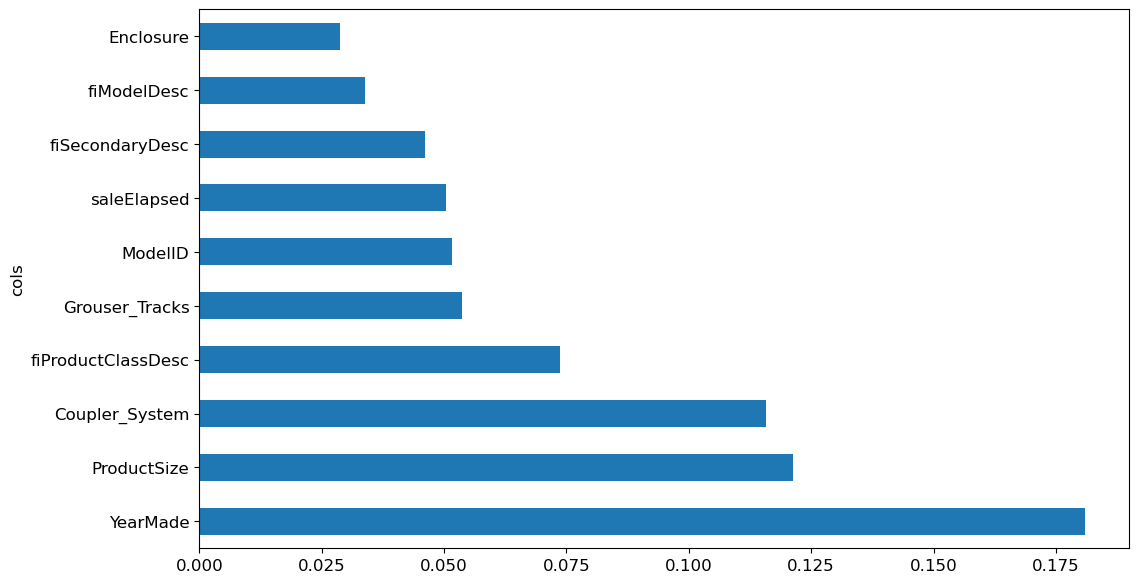

In [39]:
plot_fi(fi[:10])

Removing Low Importance Features

In [40]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [41]:
xs_imp = xs[to_keep]

In [42]:
valid_xs_imp = valid_xs[to_keep]

In [43]:
m = rf(xs_imp,y)

In [44]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181379, 0.232255)

In [45]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

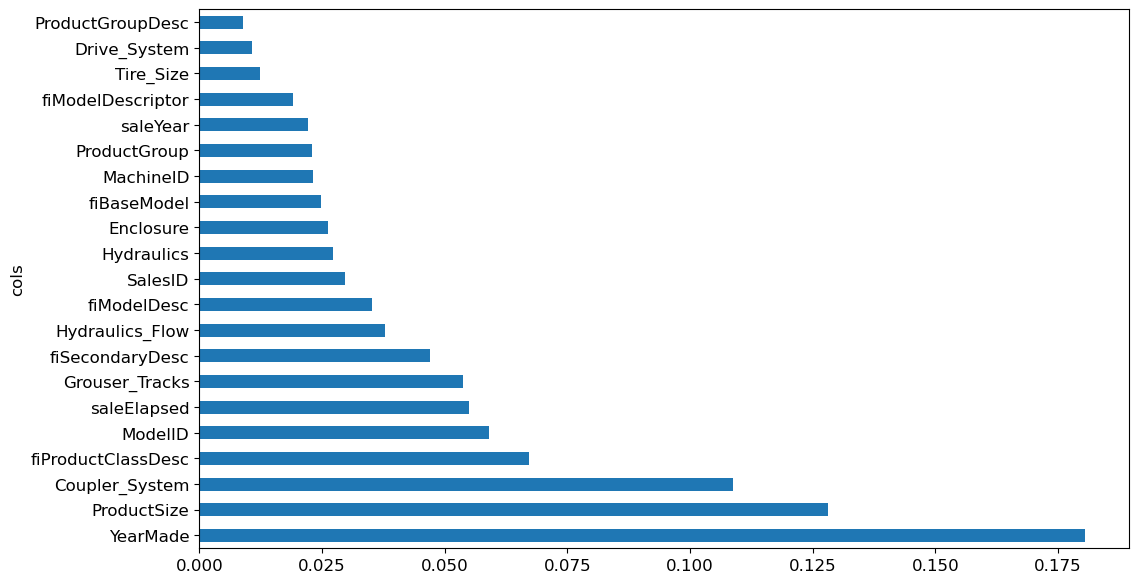

In [46]:
plot_fi(rf_feat_importance(m, xs_imp));

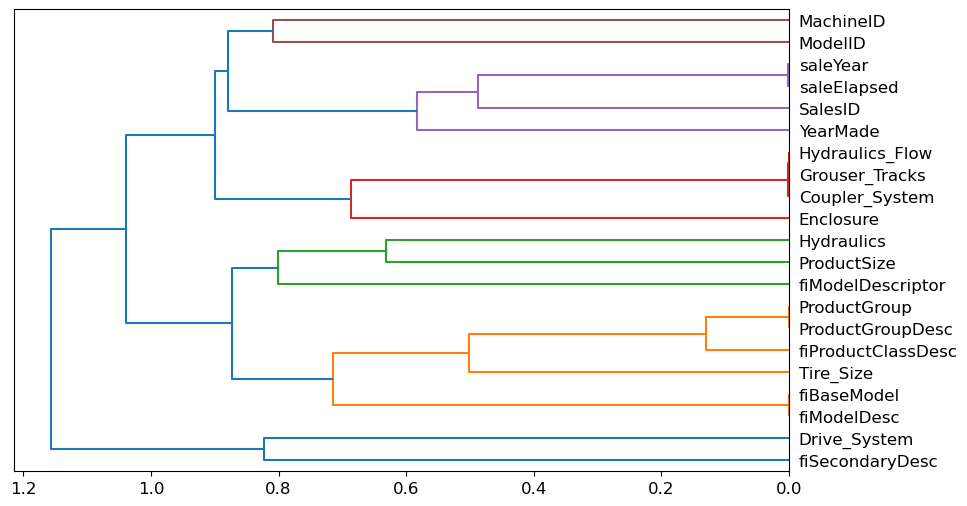

In [47]:
cluster_columns(xs_imp)

In [48]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
                             max_samples=50000, max_features=0.5,
                             n_jobs=-1, oob_score=True)
    m.fit(df,y)
    return m.oob_score_

In [49]:
get_oob(xs_imp)

0.8771089554751703

In [52]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear','saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel','Hydraulics_Flow','Grouser_Tracks','Coupler_System')}

{'saleYear': 0.8769285714848665,
 'saleElapsed': 0.8726991317379869,
 'ProductGroupDesc': 0.878080512501803,
 'ProductGroup': 0.8777345499048408,
 'fiModelDesc': 0.8761385274816614,
 'fiBaseModel': 0.8772927422531888,
 'Hydraulics_Flow': 0.8776838634778727,
 'Grouser_Tracks': 0.8778474395342042,
 'Coupler_System': 0.8769267393069747}

In [53]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.875032573724393

In [54]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [20]:
m = rf(xs_final, y)
m_rmse(m, xs_final,y), m_rmse(m, valid_xs_final, valid_y)

(0.183936, 0.233514)

In [57]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

In [9]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

([<matplotlib.axis.YTick at 0x1aacb2f1400>,
 [Text(0, 0, '#na#'),
  Text(0, 1, 'Large'),
  Text(0, 2, 'Large / Medium'),
  Text(0, 3, 'Medium'),
  Text(0, 4, 'Small'),
  Text(0, 5, 'Mini'),
  Text(0, 6, 'Compact')])

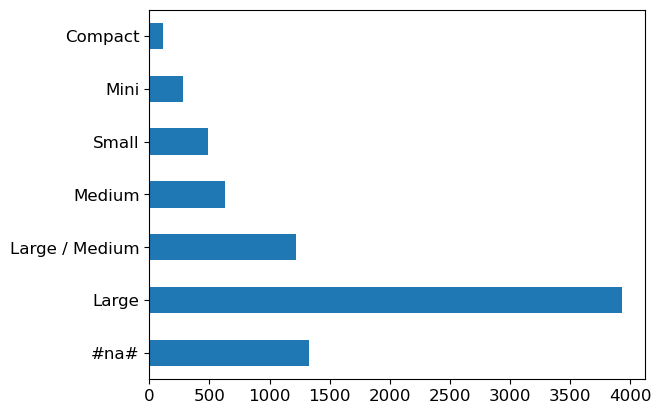

In [10]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c= to.classes['ProductSize']
plt.yticks(range(len(c)), c)

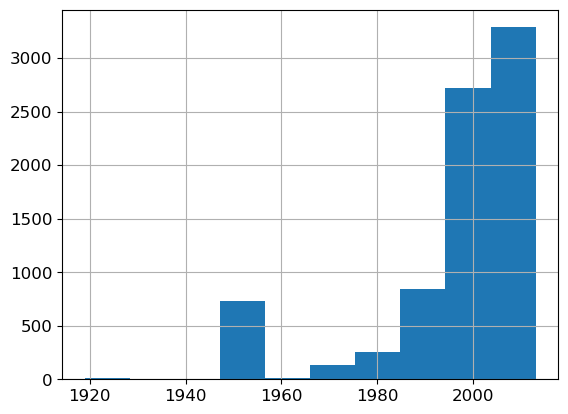

In [11]:
ax = valid_xs_final['YearMade'].hist()

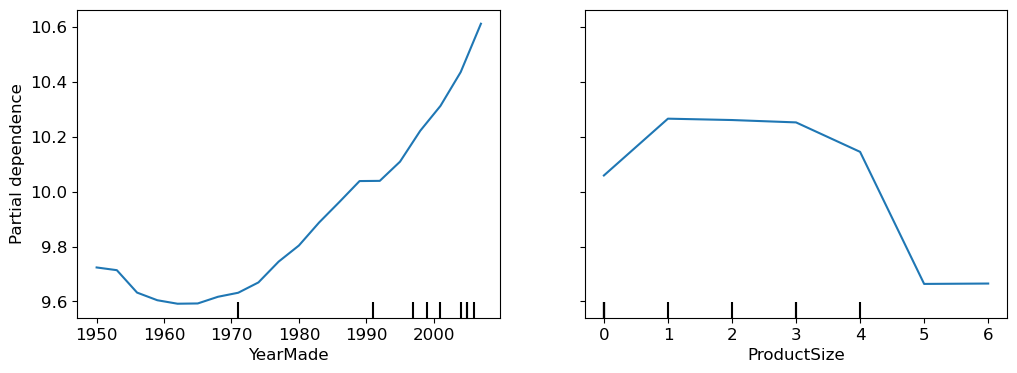

In [19]:
from sklearn.inspection import PartialDependenceDisplay

fig,ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

In [21]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [22]:
row = valid_xs_final.iloc[:5]

In [23]:
prediction, bias, contributions = treeinterpreter.predict(m, row.values)

In [34]:
contributions[0]

array([-0.40499481,  0.16919274,  0.05446403,  0.03410256,  0.21983181, -0.01796631, -0.10813423, -0.00977955, -0.01305524,  0.02983333, -0.03489188,  0.00970594, -0.0201004 ,  0.01604006,
        0.00422491,  0.01234706, -0.03086115])

In [29]:
prediction[0], bias[0], contributions[0].sum()

(array([10.01484864]), 10.104889769079806, -0.09004112707201939)

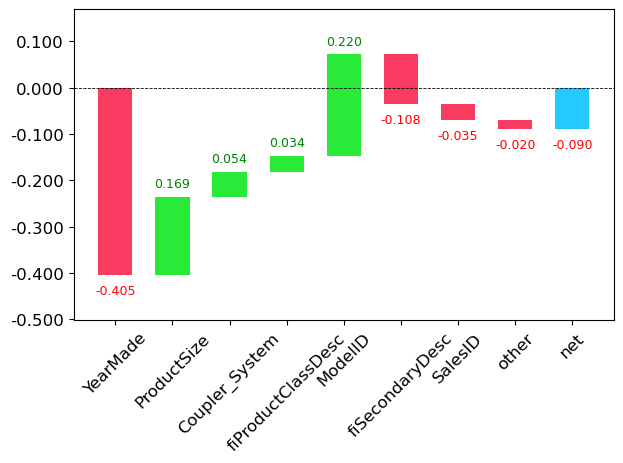

In [35]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08,
         rotation_value=45, formatting='{:,.3f}');

# Extrapolation Problem

In [37]:
np.random.seed(42)

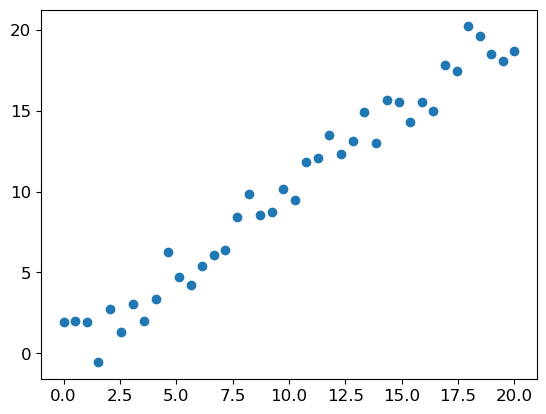

In [38]:
x_lin = torch.linspace(0,20,steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [39]:
xs_lin = x_lin.unsqueeze(1)
x_lin.shape, xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [42]:
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

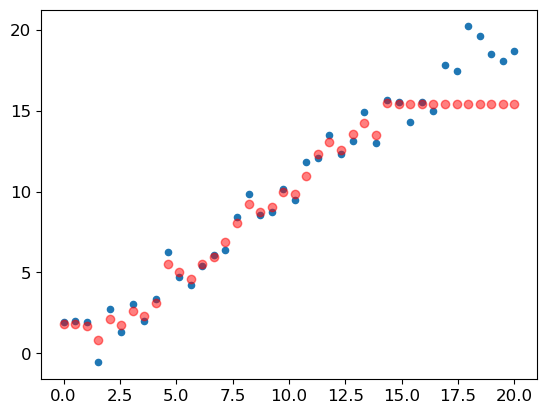

In [45]:
plt.scatter(xs_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), c='r', alpha=0.5 );

In [47]:
df_dom = pd.concat([xs_final, valid_xs_final])

is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

In [53]:
m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.899797
10,SalesID,0.082011
11,MachineID,0.013888
4,ModelID,0.000867
0,YearMade,0.000765
7,fiModelDesc,0.000391


In [54]:
m = rf(xs_final, y)
print('orig',m_rmse(m, valid_xs_final, valid_y))

orig 0.232307


In [55]:
for c in ('SalesID', 'saleElapsed', 'MachineID'):
    m= rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

SalesID 0.23021
saleElapsed 0.235246
MachineID 0.231076


In [56]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.228933

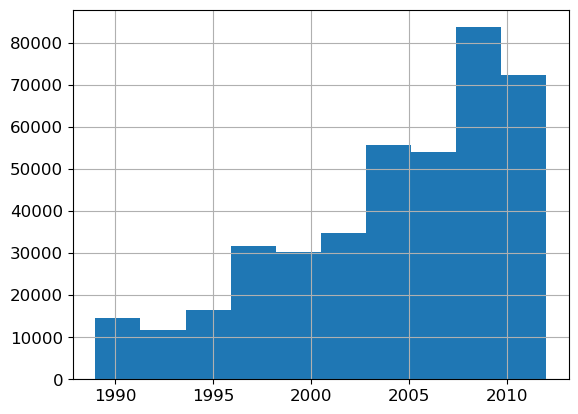

In [59]:
xs['saleYear'].hist();

In [60]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [61]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177733, 0.229614)

In [67]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn.ProductSize = df_nn['ProductSize'].cat.set_categories(sizes, ordered=True)
df_nn[dep_var] = np.log(df_nn[dep_var])

In [70]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [71]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [72]:
cont_nn

['saleElapsed']

In [80]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
fiModelDesc           5059
Enclosure                6
Hydraulics_Flow          3
fiModelDescriptor      140
Hydraulics              12
ProductGroup             6
Drive_System             4
Tire_Size               17
dtype: int64

In [81]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176687, 0.230238)

In [82]:
cat_nn.remove('fiModelDescriptor')

In [103]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits= splits,
                     y_names  = dep_var)

In [104]:
dls = to_nn.dataloaders(1024)

In [105]:
y = to_nn.train.y
y.min(),y.max()

(8.465899467468262, 11.863582611083984)

In [108]:
learn = tabular_learner(dls, y_range= (8,12), layers=[500,250],
                       n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.00015848931798245758)

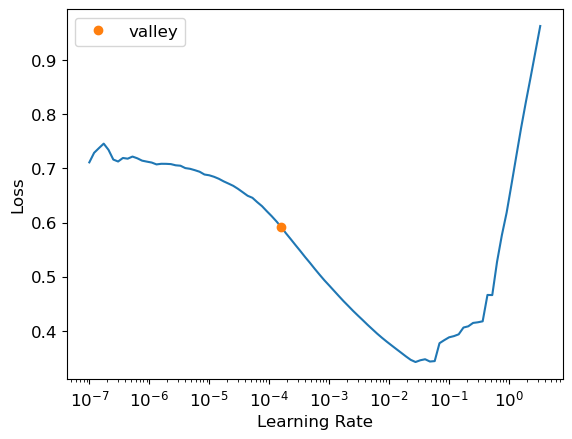

In [109]:
learn.lr_find()

In [110]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,time
0,0.063209,0.061655,00:05
1,0.053894,0.054248,00:05
2,0.047664,0.058599,00:05
3,0.043427,0.050598,00:05
4,0.040279,0.050397,00:05


In [111]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.224492

In [112]:
learn.save('nn')

Path('models/nn.pth')